<a href="https://colab.research.google.com/github/divyanshbajpai/EIP4-Coursework/blob/master/Week-3/Assignment-3%5Bfinal%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D 
from keras.layers import Activation, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 12s 0us/step


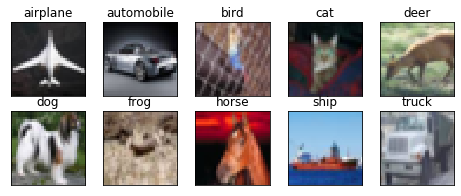

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [7]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  # This is added back by InteractiveShellApp.init_path()





Epoch 1/50





390/390 [==============================] - 28s 72ms/step - loss: 1.8654 - acc: 0.2856 - val_loss: 1.4117 - val_acc: 0.4807
Epoch 2/50
390/390 [==============================] - 20s 51ms/step - loss: 1.3394 - acc: 0.5127 - val_loss: 1.0896 - val_acc: 0.6100
Epoch 3/50
390/390 [==============================] - 20s 51ms/step - loss: 1.1174 - acc: 0.6024 - val_loss: 0.9463 - val_acc: 0.6619
Epoch 4/50
390/390 [==============================] - 20s 51ms/step - loss: 0.9731 - acc: 0.6622 - val_loss: 0.8664 - val_acc: 0.6975
Epoch 5/50
390/390 [==============================] - 20s 51ms/step - loss: 0.8734 - acc: 0.6974 - val_loss: 0.7560 - val_acc: 0.7414
Epoch 6/50
390/390 [==============================] - 20s 52ms/step - loss: 0.8028 - acc: 0.7254 - val_loss: 0.7547 - val_acc: 0.7442
Epoch 7/50
390/390 [==============================] - 20s 51ms/step - loss: 0.7455 - acc: 0.7466 - val_loss: 0.6992 - val_acc: 0.7621
Epoch 8/50
390/390 [==============================] - 

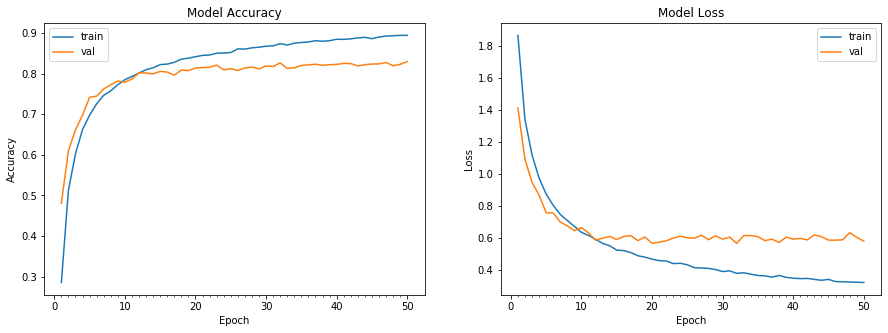

Accuracy on test data is: 82.94


In [9]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
def maxpool(x, k=2, s=2, p='same'):
  return MaxPooling2D(pool_size=k, strides=s, padding=p)(x)
def avgpool(x, k=2, s=2, p='same'):
  return AveragePooling2D(pool_size=k, strides=s, padding=p)(x)
def gavgpool(x):
  return GlobalAveragePooling2D()(x)
def sepconv(x, f, k=3, s=1, p='same', d=1, a='relu'):
  return SeparableConv2D(filters=f, kernel_size=k, strides=s, 
                padding=p, dilation_rate=d, activation=a)(x)

In [43]:

mymodel=Sequential()
mymodel.add(SeparableConv2D(32,(3,3),strides=1,padding='same',activation='relu',input_shape=(32, 32, 3))) #32,32,32
mymodel.add(BatchNormalization())
mymodel.add(Dropout(0.05))

mymodel.add(SeparableConv2D(64,(3,3),padding='same',strides=1,activation='relu'))#32,32,64
mymodel.add(BatchNormalization())
mymodel.add(Dropout(0.05))

mymodel.add(SeparableConv2D(128,(3,3),padding='same',strides=1,activation='relu'))#32,32,128
mymodel.add(BatchNormalization())
mymodel.add(Dropout(0.05))

mymodel.add(SeparableConv2D(32,(1,1),padding='same',strides=2,activation='relu'))#15,15,32
mymodel.add(BatchNormalization())
mymodel.add(Dropout(0.05))

mymodel.add(SeparableConv2D(64,(3,3),padding='same',strides=1,activation='relu'))#15,15,64
mymodel.add(BatchNormalization())
mymodel.add(Dropout(0.1))

mymodel.add(SeparableConv2D(128,(3,3),padding='same',strides=1,activation='relu'))#15,15,128
mymodel.add(BatchNormalization())
mymodel.add(Dropout(0.1))

mymodel.add(SeparableConv2D(32,(1,1),strides=2,padding='same',activation='relu'))#7,7,32
mymodel.add(BatchNormalization())
mymodel.add(Dropout(0.1))

mymodel.add(SeparableConv2D(64,(3,3),padding='same',strides=1,activation='relu'))#7,7,64
mymodel.add(BatchNormalization())
mymodel.add(Dropout(0.1))

mymodel.add(SeparableConv2D(128,(3,3),padding='same',strides=1,activation='relu'))#7,7,128
mymodel.add(BatchNormalization())
mymodel.add(Dropout(0.1))

mymodel.add(SeparableConv2D(10,(1,1),strides=2,padding='same',activation='relu'))#3,3,10
mymodel.add(BatchNormalization())


mymodel.add(GlobalAveragePooling2D())
mymodel.add(Activation('softmax'))

mymodel.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_116 (Separa (None, 32, 32, 32)        155       
_________________________________________________________________
batch_normalization_116 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_120 (Dropout)        (None, 32, 32, 32)        0         
_________________________________________________________________
separable_conv2d_117 (Separa (None, 32, 32, 64)        2400      
_________________________________________________________________
batch_normalization_117 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_121 (Dropout)        (None, 32, 32, 64)        0         
_________________________________________________________________
separable_conv2d_118 (Separa (None, 32, 32, 128)     

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<__main__..., steps_per_epoch=97, epochs=50)`


Epoch 1/50
 2/97 [..............................] - ETA: 5:22 - loss: 2.3196 - acc: 0.1064

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.691678). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


97/97 [==============================] - 43s 446ms/step - loss: 1.7865 - acc: 0.3549 - val_loss: 9.7307 - val_acc: 0.2244
Epoch 2/50
97/97 [==============================] - 38s 394ms/step - loss: 1.2999 - acc: 0.5415 - val_loss: 12.1136 - val_acc: 0.2182
Epoch 3/50
97/97 [==============================] - 38s 394ms/step - loss: 1.1197 - acc: 0.6025 - val_loss: 9.4507 - val_acc: 0.3375
Epoch 4/50
97/97 [==============================] - 38s 395ms/step - loss: 1.0264 - acc: 0.6353 - val_loss: 9.7471 - val_acc: 0.2813
Epoch 5/50
97/97 [==============================] - 38s 395ms/step - loss: 0.9669 - acc: 0.6555 - val_loss: 10.3100 - val_acc: 0.2879
Epoch 6/50
97/97 [==============================] - 38s 394ms/step - loss: 0.9091 - acc: 0.6769 - val_loss: 6.4618 - val_acc: 0.4037
Epoch 7/50
97/97 [==============================] - 38s 394ms/step - loss: 0.8604 - acc: 0.6972 - val_loss: 11.0343 - val_acc: 0.2235
Epoch 8/50
97/97 [==============================] - 38s 393ms/step - loss: 0.

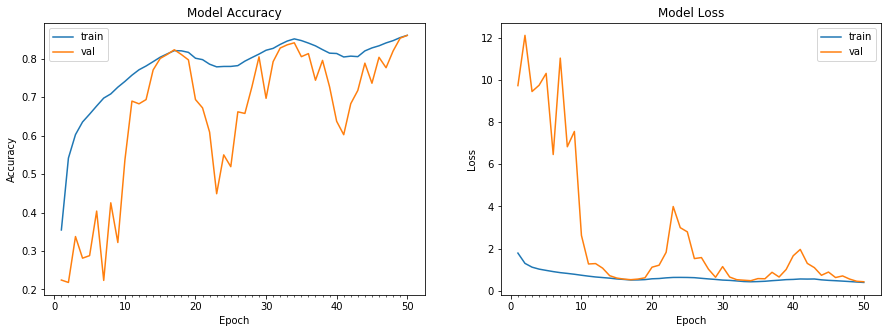

Accuracy on test data is: 86.04


In [44]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.callbacks import *

epoch=50
batch_size=512

clr = CyclicLR(
	base_lr=0.0005,
	max_lr=0.09,
	step_size= 811)



mymodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

datagen = ImageDataGenerator(shear_range=0.1,zoom_range=0.1,horizontal_flip=True)

#datagen.standardize(train_features)
# train the model
start = time.time()
# Train the model

model_info = mymodel.fit_generator(datagen.flow(train_features, train_labels, batch_size = batch_size),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = epoch, 
                                 validation_data = (test_features, test_labels),verbose=1,
                                 callbacks=[clr])


end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, mymodel))

LR range vs iteration


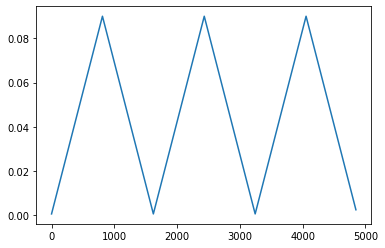

Loss vs LR


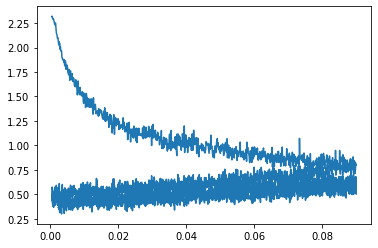

In [45]:
lr = clr.history['lr']
loss = clr.history['loss']

import matplotlib.pyplot as plt
print('LR range vs iteration')
plt.plot(range(len(lr)), lr)
plt.show()
print('Loss vs LR')
plt.plot(lr, loss)
plt.show()

In [0]:
from tensorflow.keras.callbacks import *

class CyclicLR(Callback):
    """This callback implements a cyclical learning rate policy (CLR).
    The method cycles the learning rate between two boundaries with
    some constant frequency, as detailed in this paper (https://arxiv.org/abs/1506.01186).
    The amplitude of the cycle can be scaled on a per-iteration or 
    per-cycle basis.
    This class has three built-in policies, as put forth in the paper.
    "triangular":
        A basic triangular cycle w/ no amplitude scaling.
    "triangular2":
        A basic triangular cycle that scales initial amplitude by half each cycle.
    "exp_range":
        A cycle that scales initial amplitude by gamma**(cycle iterations) at each 
        cycle iteration.
    For more detail, please see paper.
    
    # Example
        ```python
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., mode='triangular')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```
    
    Class also supports custom scaling functions:
        ```python
            clr_fn = lambda x: 0.5*(1+np.sin(x*np.pi/2.))
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., scale_fn=clr_fn,
                                scale_mode='cycle')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```    
    # Arguments
        base_lr: initial learning rate which is the
            lower boundary in the cycle.
        max_lr: upper boundary in the cycle. Functionally,
            it defines the cycle amplitude (max_lr - base_lr).
            The lr at any cycle is the sum of base_lr
            and some scaling of the amplitude; therefore 
            max_lr may not actually be reached depending on
            scaling function.
        step_size: number of training iterations per
            half cycle. Authors suggest setting step_size
            2-8 x training iterations in epoch.
        mode: one of {triangular, triangular2, exp_range}.
            Default 'triangular'.
            Values correspond to policies detailed above.
            If scale_fn is not None, this argument is ignored.
        gamma: constant in 'exp_range' scaling function:
            gamma**(cycle iterations)
        scale_fn: Custom scaling policy defined by a single
            argument lambda function, where 
            0 <= scale_fn(x) <= 1 for all x >= 0.
            mode paramater is ignored 
        scale_mode: {'cycle', 'iterations'}.
            Defines whether scale_fn is evaluated on 
            cycle number or cycle iterations (training
            iterations since start of cycle). Default is 'cycle'.
    """

    def __init__(self, base_lr=0.001, max_lr=0.006, step_size=2000., mode='triangular',
                 gamma=1., scale_fn=None, scale_mode='cycle'):
        super(CyclicLR, self).__init__()

        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.mode = mode
        self.gamma = gamma
        if scale_fn == None:
            if self.mode == 'triangular':
                self.scale_fn = lambda x: 1.
                self.scale_mode = 'cycle'
            elif self.mode == 'triangular2':
                self.scale_fn = lambda x: 1/(2.**(x-1))
                self.scale_mode = 'cycle'
            elif self.mode == 'exp_range':
                self.scale_fn = lambda x: gamma**(x)
                self.scale_mode = 'iterations'
        else:
            self.scale_fn = scale_fn
            self.scale_mode = scale_mode
        self.clr_iterations = 0.
        self.trn_iterations = 0.
        self.history = {}

        self._reset()

    def _reset(self, new_base_lr=None, new_max_lr=None,
               new_step_size=None):
        """Resets cycle iterations.
        Optional boundary/step size adjustment.
        """
        if new_base_lr != None:
            self.base_lr = new_base_lr
        if new_max_lr != None:
            self.max_lr = new_max_lr
        if new_step_size != None:
            self.step_size = new_step_size
        self.clr_iterations = 0.
        
    def clr(self):
        cycle = np.floor(1+self.clr_iterations/(2*self.step_size))
        x = np.abs(self.clr_iterations/self.step_size - 2*cycle + 1)
        if self.scale_mode == 'cycle':
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(cycle)
        else:
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(self.clr_iterations)
        
    def on_train_begin(self, logs={}):
        logs = logs or {}

        if self.clr_iterations == 0:
            K.set_value(self.model.optimizer.lr, self.base_lr)
        else:
            K.set_value(self.model.optimizer.lr, self.clr())        
            
    def on_batch_end(self, epoch, logs=None):
        
        logs = logs or {}
        self.trn_iterations += 1
        self.clr_iterations += 1

        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.trn_iterations)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        
        K.set_value(self.model.optimizer.lr, self.clr())